## ANALYZING TOP PAYING ROLES

**GOAL**

1. You are an aspiring data nerd looking to analyze the top-paying roles and skills
2. You will write Python code to explore this large dataset specific to you.

**DELIVERABLES**<br>
Final Capstone Project: <br>
    <li> Create a Jupyter Notebook/s (showcasing all skills from course).
    <li> A summary page (via readme.md) capturing your findings
    <li> A final project shareable via GitHub & LinkedIn
<br>        
**QUESTIONS TO ANSWER**
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast                          # to convert columns to lists

In [2]:
df = pd.read_csv('C:/Users/RICH TECH COMPUTERS/Documents/Job documents/YouTube/\
Python/Datasets/data_jobs.csv')
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [3]:
# Convert the date column from object to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert the job_skills column from object to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

---

## EXPLORATORY DATA ANALYSIS

### Filter for US Data Analyst Roles

In [4]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [5]:
# Check on job location
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


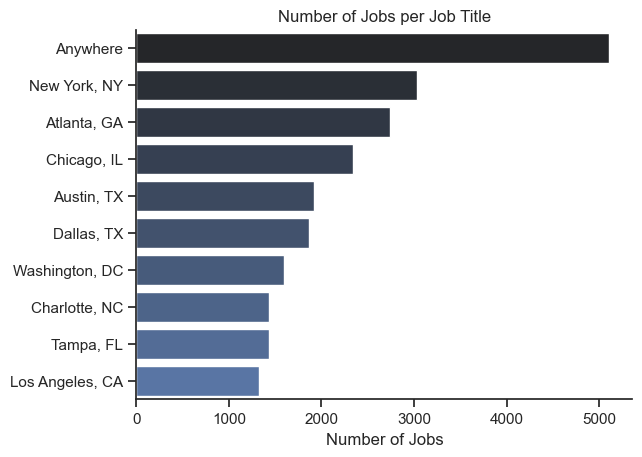

In [6]:
# plot the locations
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot,
           x = 'count',
           y = df_plot.index,
           #hue = 'count',
           palette = 'dark:b',
           #legend = False
           )
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

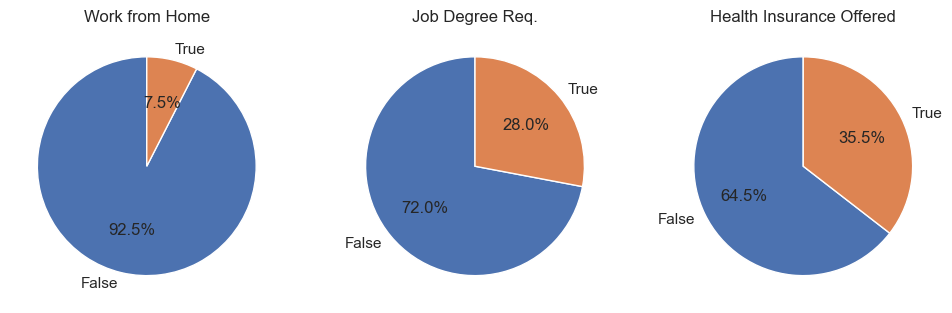

In [7]:
# Visualize some conditions related to the job
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

# create a dictionary of all the columns to be plotted
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), 
              startangle = 90,
              autopct = '%1.1f%%',
             labels = ['False','True'])
    ax[i].set_title(title)

plt.show()

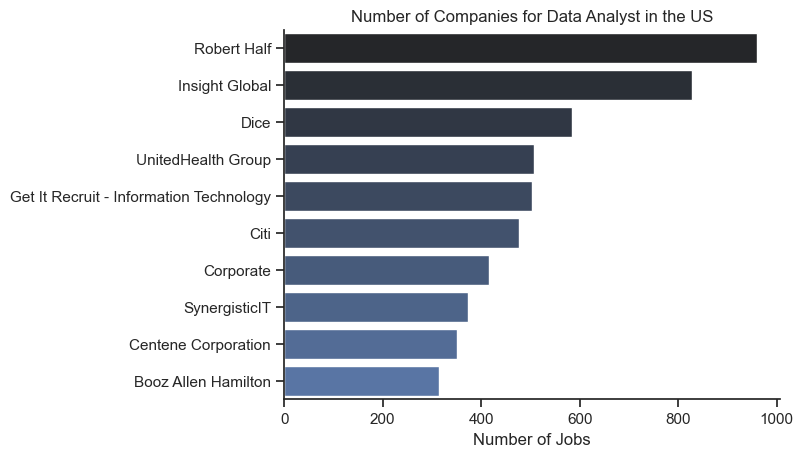

In [8]:
# Verify the counts of the various companies offering data roles
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

# plot the locations
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot,
           x = 'count',
           y = df_plot.index,
           #hue = 'count',
           palette = 'dark:b',
           #legend = False
           )
sns.despine()
plt.title('Number of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### 1. What are the most demanded skills for Data Analysts?

**Methodology**

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings

#### 1. Clean-up Skill Column

In [9]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']].head()

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab


#### 2. Calculate skill count based on `job_title_short`

In [10]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

#change to a dataframe
df_skills_count = df_skills_count.reset_index(name = 'skill_count')

# sort the skill count from highest to lowest
df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [11]:
# Get a list of the top three roles
job_titles = df_skills_count['job_title_short'].unique().tolist()

# sort the top 3 in alphabetic order
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

#### 3. Plot Initial Findings

C:\Users\RICH TECH COMPUTERS\AppData\Local\Temp\ipykernel_14540\55935327.py:14: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\RICH TECH COMPUTERS\AppData\Local\Temp\ipykernel_14540\55935327.py:14: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


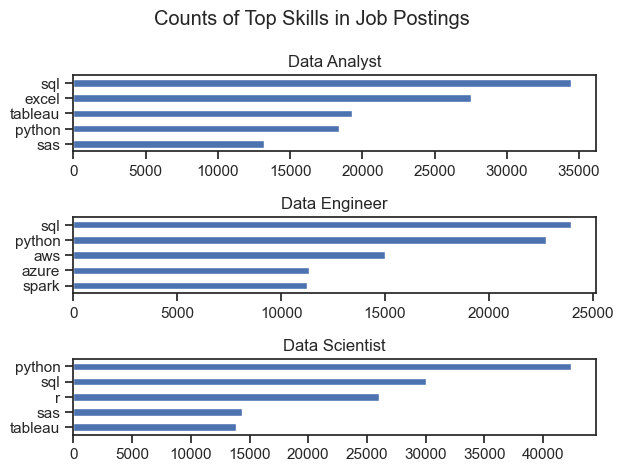

In [12]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count',
                ax = ax[i], title = job_title)

    # Adjust chart parameters
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

    # Adjust plot layout
    fig.tight_layout()
    fig.suptitle('Counts of Top Skills in Job Postings')
    

#### 4. Calculate Skill Percentage

In [13]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [14]:
# merget the total counts to the skill count dataset
df_skills_pec = df_skills_count.merge(df_job_title_count, how = 'left', on = 'job_title_short')
df_skills_pec.head()

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830


In [15]:
# add the percentage column
df_skills_pec['skill_percent'] = 100*(df_skills_pec['skill_count']/df_skills_pec['jobs_total'])
df_skills_pec.head()

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534


#### 5. Plot final findings

C:\Users\RICH TECH COMPUTERS\AppData\Local\Temp\ipykernel_14540\2599739328.py:23: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad = 0.5)
C:\Users\RICH TECH COMPUTERS\AppData\Local\Temp\ipykernel_14540\2599739328.py:23: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad = 0.5)


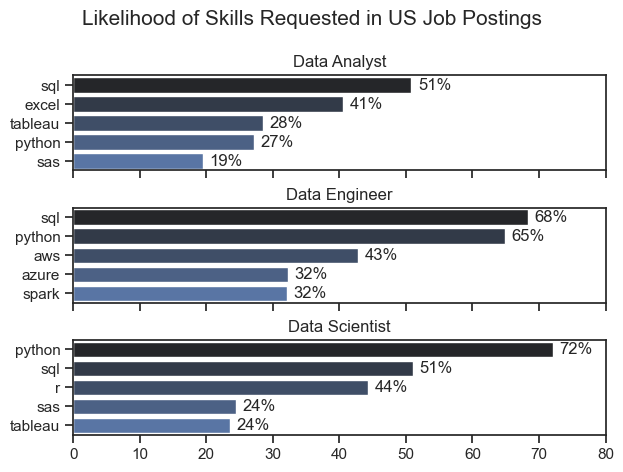

In [16]:
# plot the values again with seaborn
fig, ax = plt.subplots(len(job_titles), 1, sharex = True)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_pec[df_skills_pec['job_title_short'] == job_title].head()
    sns.barplot(data = df_plot,
               y  = 'job_skills', 
               x = 'skill_percent',
               palette = 'dark:b',
               ax = ax[i])
    # Adjust chart parameters
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,80)
    
    # Add value labels on the charts
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, 
                   f'{v:.0f}%',
                  va = 'center')
    # Adjust plot layout
    fig.tight_layout(h_pad = 0.5)
    fig.suptitle('Likelihood of Skills Requested in US Job Postings',
                fontsize = 15)
    

## 2. How are in-demand skills trending for Data Analysts?

**Methodology**
- Aggregate skill counts monthly
- Re-analyze based on percentage of total jobs
- Plot the monthly skill demand

#### 1. Aggregate skill counts monthly

In [17]:
# add a month column
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [18]:
df_DA_US_explode = df_DA_US.explode('job_skills').copy()

In [19]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index = 'job_posted_month_no',
                            columns = 'job_skills',
                            aggfunc= 'size',
                            fill_value = 0)
df_DA_US_pivot.head()

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9


In [20]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [21]:
# Sort the columns by the total
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending = False).index].copy()
df_DA_US_pivot.tail()

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0
10,2574,1922,1429,1373,960,835,921,498,473,433,...,0,0,0,1,0,0,0,0,0,0
11,2054,1533,1148,1049,792,647,682,430,403,306,...,0,0,0,0,0,0,0,0,0,0
12,1848,1525,1080,1076,780,658,699,451,394,265,...,0,0,1,0,0,0,0,0,1,0
Total,34452,27519,19311,18382,13200,11659,11630,7611,7175,5109,...,1,1,1,1,1,1,1,1,1,1


In [22]:
# drop the total row
df_DA_US_pivot.drop('Total', inplace = True)
df_DA_US_pivot.tail()

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0
10,2574,1922,1429,1373,960,835,921,498,473,433,...,0,0,0,1,0,0,0,0,0,0
11,2054,1533,1148,1049,792,647,682,430,403,306,...,0,0,0,0,0,0,0,0,0,0
12,1848,1525,1080,1076,780,658,699,451,394,265,...,0,0,1,0,0,0,0,0,1,0


#### 2. Re-analyze based on percentage of total jobs

In [23]:
# get the totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [24]:
# convert the skills pivot into percentages
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis = 0)
df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# Get the actual month names

df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = (df_DA_US_percent['job_posted_month_no']
                                        .apply(lambda x: pd.to_datetime(x, format='%m'))
                                        .dt.strftime('%b'))
df_DA_US_percent

job_skills,job_posted_month_no,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,...,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess,job_posted_month
0,1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000,Jan
1,2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Feb
2,3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mar
3,4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,...,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,Apr
4,5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,May
5,6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,...,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000,Jun
6,7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Jul
7,8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Aug
8,9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sep
9,10,48.833238,36.463669,27.110605,26.048188,18.212863,15.841396,17.472965,9.447923,8.973629,...,0.000000,0.000000,0.018972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Oct


In [26]:
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns = 'job_posted_month_no')
df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


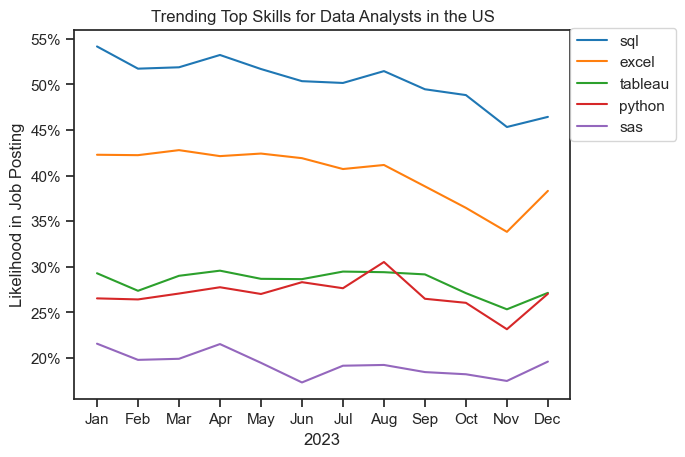

In [27]:
# get the first five columns
df_plot = df_DA_US_percent.iloc[:,:5]

sns.set_theme(style = 'ticks')
sns.lineplot(data = df_plot,
            dashes = False,
            palette='tab10')
# sns.despine() # remove the top and right lines of chart frame
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend(loc = [1,0.7])

# format the y axis
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

# # add skill name at the end of the line
# for i in range(5):
#     plt.text(11.2, # this is the last month index number
#             df_plot.iloc[-1,i], # plot the text in the last row
#             df_plot.columns[i])

### 3. How well do jobs and skills pay for Data Analysts?

**Methodology**
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
1. Visualize for highest paying skills and most demanded skills

In [28]:
# check for missing values on the yearly salary column
df_US['salary_year_avg'].isna().sum()

190526

In [29]:
# drop the missing values
df_US = df_US.dropna(subset='salary_year_avg')
df_US['salary_year_avg'].isna().sum()

0

In [30]:
# get the top 6 roles
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [31]:
# Get the data frame for top 6
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)].copy()
df_US_top6.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."


#### 1. Evaluate median salary for top 6 data jobs

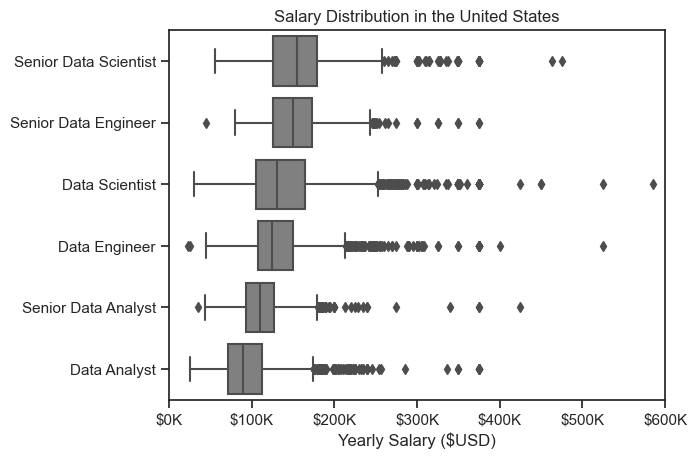

In [32]:
# plot the acquired job roles by their median salary
# Creating an order of the job titles
order_median = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values().index

# Create the boxplot with the ordered axis
sns.boxplot(data = df_US_top6,
           x = 'salary_year_avg',
           y = 'job_title_short'
           , order = order_median
           , color = 'gray')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)
# modify the x axis
ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

#### 2. Find median salary per skill for Data Analysts

In [37]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6


In [38]:
# drop all missing values
df_DA_US = df_DA_US.dropna(subset = 'salary_year_avg')


In [40]:
df_DA_US[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [47]:
# Get the top paying skills
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'median', ascending = False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [50]:
# sort top pay by the count to have the most sought after skills
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.head(10).sort_values(by = 'median', ascending = False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


#### 3. Visualize for highest paying skills and most demanded skills

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

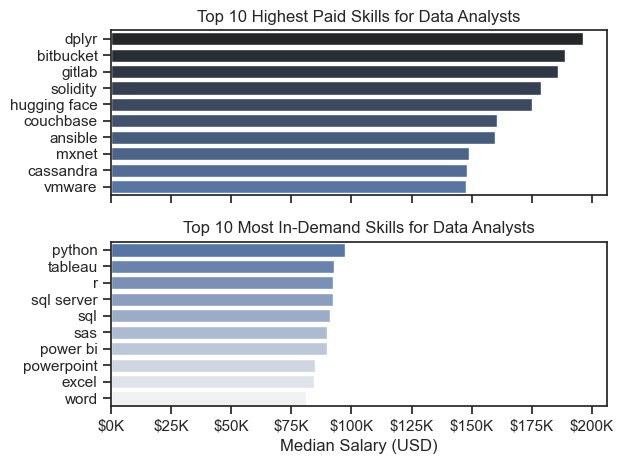

In [51]:
# plot the values on the same figure usin seaborn
# create figure and axis
plt.figure(figsize = (15,10))
fig, ax = plt.subplots(2, 1, sharex = True)

# Plot for Top 10 highest paid skills
# (df_DA_top_pay[::-1].plot(kind = 'barh', y = 'median', ax = ax[0]))

sns.barplot(data = df_DA_top_pay,
            x = 'median',
           y = df_DA_top_pay.index,
           ax = ax[0],
           #hue = 'median',
           palette= 'dark:b')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove()

# Plot for Top 10 Most in demand skills
# (df_DA_skills[::-1].plot(kind  = 'barh', y = 'median', ax = ax[1]))
sns.barplot(data = df_DA_skills,
            x = 'median',
            y = df_DA_skills.index,
            #hue = 'median',
            palette = 'light:b_r',
            ax = ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()

# set the limit of the second chart to match of the first
ax[1].set_xlim(ax[0].get_xlim()) 

# adjust layout to prevent overlap
fig.tight_layout()
plt.show()

## What is the Most Optimal Skill to Learn for Data Analysts?

**Methodology**

1. Group skills to determine median salary and likelihood of being in posting
1. Visualize median salary vs. percent skill demand
1. Determine if certain technologies are more prevalent

In [87]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset= 'salary_year_avg')
df_DA_US_exploded = df_DA_US.explode('job_skills') 

1. Group skills to determine median salary and likelihood of being in posting

In [88]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.rename(
                                columns = {'count':'skill_count',
                                          'median': 'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [89]:
# Create the percentage counts
DA_job_count = len(df_DA_US)

# Create percentage column
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count']/DA_job_count)*100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [93]:
# filter the values that are above 5
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


#### 2. Visualize median salary vs. percent skill demand

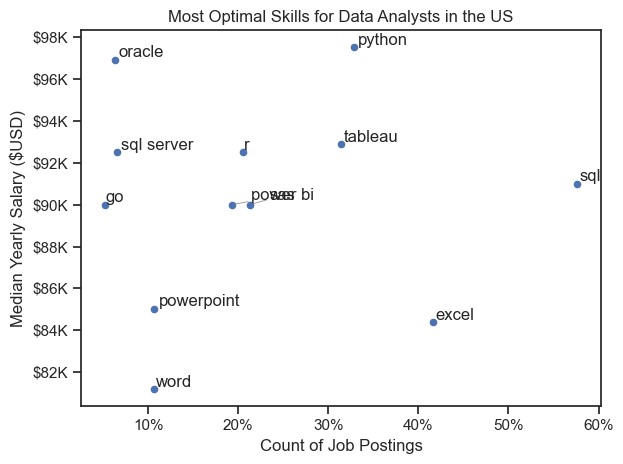

In [108]:
from adjustText import adjust_text
# changing the y ticks
# fig, ax = plt.subplots() or


df_DA_skills_high_demand.plot(kind = 'scatter',
                x = 'skill_percent',
                y = 'median_salary')

text = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    text.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i], txt))
    
#     Add arrows to the labels of the dots
adjust_text(text,
            arrowprops  = dict(arrowstyle = "->",
                               color = 'gray', 
                               lw = 0.5))

    # Setting the y axis into short form values
ax = plt.gca()
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(
        lambda y, pos: f'${int(y/1000)}K'))
# Set x axis to percent values
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()

#### 3. Determine if certain technologies are more prevalent

In [109]:
df['job_type_skills'].head()

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
Name: job_type_skills, dtype: object

In [110]:
df_technology = df['job_type_skills'].copy()
# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove missing values
df_technology = df_technology.dropna()

In [112]:
# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if the key is already present, add value
            technology_dict[key] += value
        else:
            technology_dict[key] = value # Else add key and value
            
    

In [113]:
# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

In [114]:
technology_dict

{'analyst_tools': ['spreadsheet',
  'powerpoint',
  'sharepoint',
  'splunk',
  'ssis',
  'word',
  'ssrs',
  'datarobot',
  'sheets',
  'excel',
  'nuix',
  'msaccess',
  'microstrategy',
  'tableau',
  'cognos',
  'power bi',
  'sas',
  'ms access',
  'dax',
  'spss',
  'alteryx',
  'esquisse',
  'qlik',
  'visio',
  'sap',
  'looker',
  'powerbi',
  'outlook'],
 'programming': ['swift',
  'clojure',
  'pascal',
  'powershell',
  'lisp',
  'julia',
  'matlab',
  'sass',
  'ruby',
  'fortran',
  'haskell',
  'apl',
  'no-sql',
  'visualbasic',
  'c',
  'solidity',
  'delphi',
  'css',
  'java',
  'f#',
  'erlang',
  'shell',
  'c#',
  'objective-c',
  't-sql',
  'dart',
  'go',
  'groovy',
  'crystal',
  'assembly',
  'mongodb',
  'c++',
  'visual basic',
  'sas',
  'vba',
  'cobol',
  'lua',
  'javascript',
  'nosql',
  'mongo',
  'kotlin',
  'python',
  'ocaml',
  'typescript',
  'sql',
  'r',
  'php',
  'vb.net',
  'golang',
  'perl',
  'elixir',
  'rust',
  'html',
  'bash',
  'sc

In [115]:
# convert it to a dataset
df_technology = pd.DataFrame(list(technology_dict.items()), 
            columns= ['technology','skills'])
df_technology.head()

,technology,skills
0,analyst_tools,"[spreadsheet, powerpoint, sharepoint, splunk, ..."
1,programming,"[swift, clojure, pascal, powershell, lisp, jul..."
2,cloud,"[gcp, colocation, watson, oracle, firebase, ov..."
3,libraries,"[gdpr, keras, react, spark, pyspark, ggplot2, ..."
4,other,"[ansible, terminal, unity, codecommit, git, un..."


In [116]:
# Explode the skills column
df_technology = df_technology.explode('skills')
df_technology.head()

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,powerpoint
0,analyst_tools,sharepoint
0,analyst_tools,splunk
0,analyst_tools,ssis


In [118]:
# merge the high demand dataset with the tech skills data
df_plot  = df_DA_skills_high_demand.merge(df_technology, 
                              left_on= 'job_skills',
                              right_on= 'skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


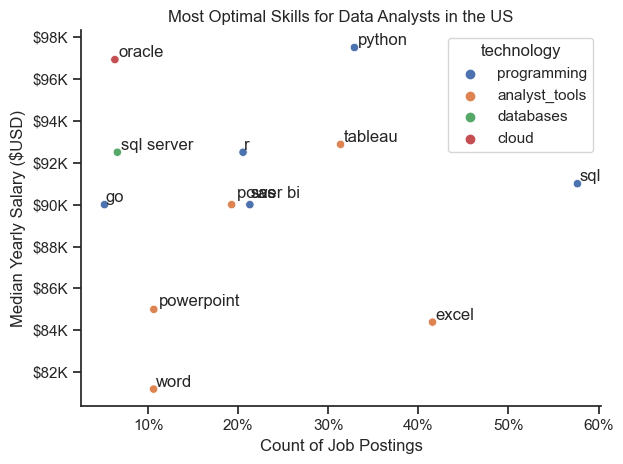

In [122]:
from adjustText import adjust_text
# changing the y ticks
# fig, ax = plt.subplots() or


sns.scatterplot(
    data = df_plot,
    x = 'skill_percent',
    y = 'median_salary',
    hue = 'technology')

sns.despine()
sns.set_theme(style = 'ticks')


text = []
for i, txt in enumerate(df_plot['skills']):
    text.append(plt.text(df_plot['skill_percent'].iloc[i],
            df_plot['median_salary'].iloc[i], txt))
    
#     Add arrows to the labels of the dots
adjust_text(text,
            arrowprops  = dict(arrowstyle = "->",
                               color = 'gray', 
                               lw = 0.5))

    # Setting the y axis into short form values
ax = plt.gca()
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(
        lambda y, pos: f'${int(y/1000)}K'))
# Set x axis to percent values
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()